In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

In [5]:
df = pd.read_csv(data_url)

In [6]:
df = df.rename(columns={'mode':'modes'})

In [7]:
df_main = df.groupby('track_id',as_index=False).first()

In [8]:
df_main['binary_outcome'] = np.where( df_main.track_popularity > 45, 1, 0 )

In [9]:
df_main['binary_outcome'] = df_main['binary_outcome'].astype(str)

In [10]:
df_main = df_main.drop(columns='track_popularity')

In [11]:
df_clean = df_main.select_dtypes('number').copy()

In [12]:
df_clean.shape

(28356, 12)

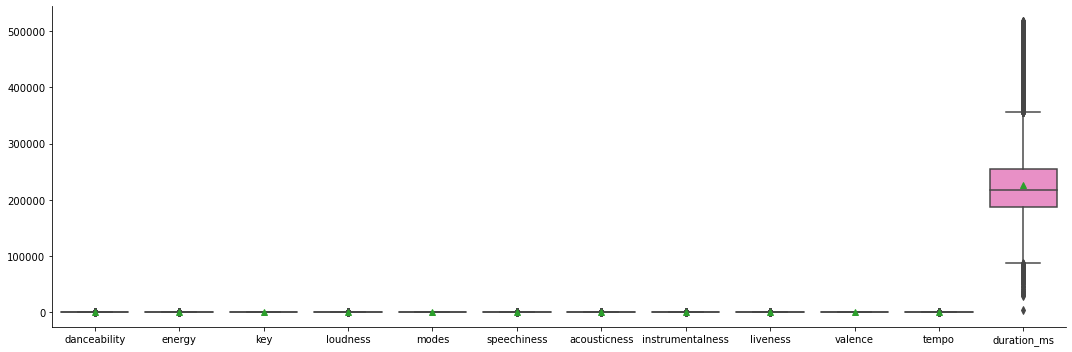

In [13]:
sns.catplot(data = df_clean, kind='box', aspect=3, showmeans=True)

plt.show()

As we can see we will need to standardize the variable into one scale.

In [14]:
X = StandardScaler().fit_transform(df_clean)

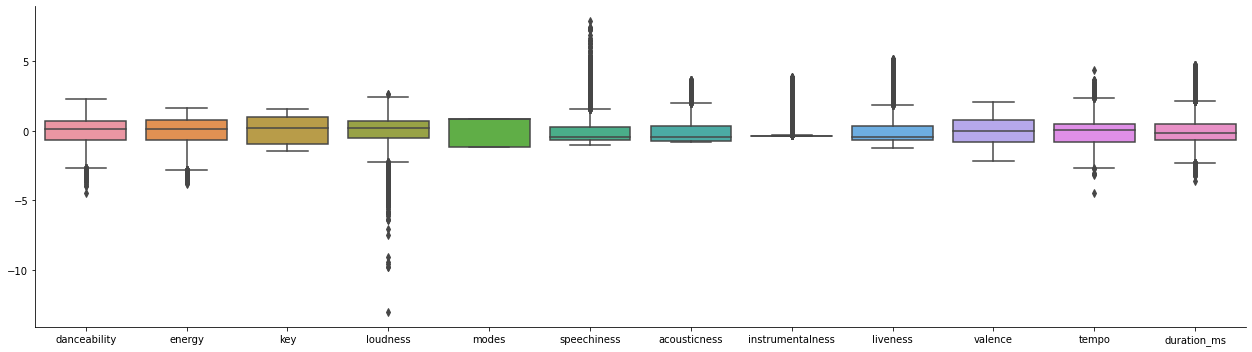

In [15]:
sns.catplot(data = pd.DataFrame(X, columns=df_clean.columns), kind='box', aspect=3.5)

plt.show()

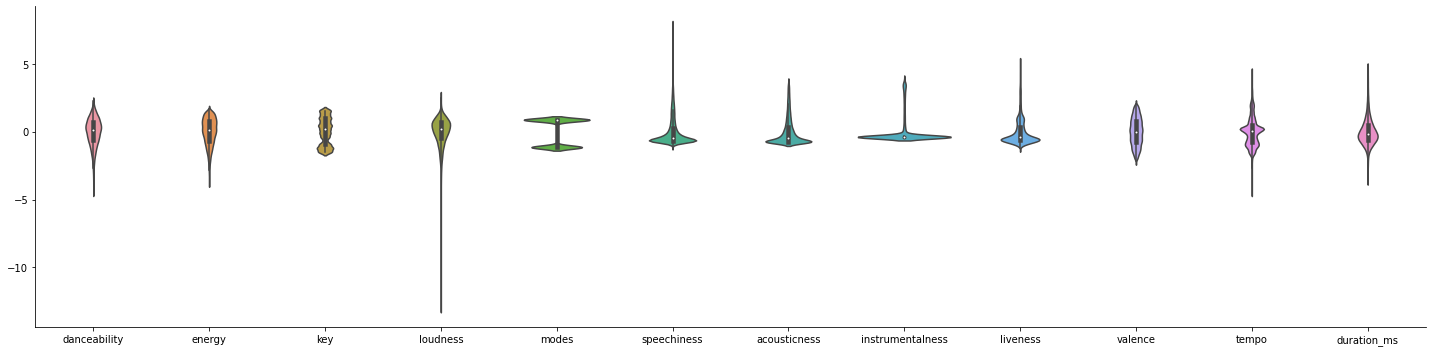

In [16]:
sns.catplot(data = pd.DataFrame(X, columns=df_clean.columns), kind='violin', aspect=4)

plt.show()

In [17]:
df_clean.loc[df_clean.danceability == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
18262,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [18]:
df_clean.loc[df_clean.energy == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [19]:
df_clean.loc[df_clean.key == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
17,0.665,0.771,0,-5.779,1,0.0533,0.0155,0.000010,0.4600,0.764,109.945,265600
23,0.672,0.761,0,-9.644,1,0.2480,0.0514,0.000000,0.4740,0.731,102.192,244733
29,0.234,0.757,0,-5.554,1,0.0421,0.0165,0.000017,0.0967,0.131,86.671,256800
43,0.725,0.903,0,-2.955,1,0.0658,0.0344,0.000000,0.1830,0.946,142.006,211680
73,0.772,0.413,0,-8.193,0,0.0890,0.0361,0.000000,0.1110,0.211,131.965,246213
...,...,...,...,...,...,...,...,...,...,...,...,...
28309,0.646,0.787,0,-4.654,1,0.0602,0.2580,0.000000,0.1990,0.773,131.036,202893
28312,0.735,0.652,0,-5.257,1,0.2740,0.0266,0.000000,0.1690,0.684,168.403,326267
28333,0.566,0.397,0,-8.475,1,0.0288,0.4600,0.000000,0.1070,0.237,146.834,195328
28338,0.694,0.830,0,-5.222,1,0.0369,0.3700,0.000010,0.1940,0.808,93.377,244053


In [20]:
df_clean.loc[df_clean.loudness == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [21]:
df_clean.loc[df_clean.modes == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
3,0.659,0.794,10,-5.644,0,0.0540,0.000761,0.132000,0.3220,0.852,128.041,228565
5,0.836,0.799,7,-4.247,0,0.0873,0.187000,0.000000,0.0920,0.772,94.033,217653
6,0.389,0.616,1,-8.747,0,0.2840,0.453000,0.000000,0.9160,0.716,145.461,289227
13,0.521,0.902,11,-4.826,0,0.1970,0.016400,0.001050,0.7370,0.592,104.708,181693
14,0.826,0.713,9,-4.017,0,0.1290,0.074800,0.000000,0.3310,0.750,102.071,226739
...,...,...,...,...,...,...,...,...,...,...,...,...
28346,0.608,0.798,6,-5.092,0,0.0432,0.073600,0.000000,0.1560,0.501,92.943,185360
28347,0.667,0.766,7,-5.513,0,0.0905,0.282000,0.000000,0.1270,0.724,74.776,208074
28349,0.715,0.745,9,-6.265,0,0.1870,0.192000,0.000011,0.0807,0.802,191.985,220000
28352,0.832,0.666,1,-4.920,0,0.0633,0.143000,0.000000,0.0720,0.810,109.536,223890


In [22]:
df_clean.loc[df_clean.speechiness == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
18262,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [23]:
df_clean.loc[df_clean.acousticness == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
18262,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [24]:
df_clean.loc[df_clean.instrumentalness == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1,0.582,0.704,5,-6.242,1,0.0347,0.0651,0.0,0.2120,0.698,150.863,197286
5,0.836,0.799,7,-4.247,0,0.0873,0.1870,0.0,0.0920,0.772,94.033,217653
6,0.389,0.616,1,-8.747,0,0.2840,0.4530,0.0,0.9160,0.716,145.461,289227
7,0.764,0.594,6,-10.050,1,0.1850,0.5910,0.0,0.1450,0.695,87.261,286441
9,0.573,0.746,10,-4.894,1,0.0421,0.0249,0.0,0.3610,0.134,130.001,188000
...,...,...,...,...,...,...,...,...,...,...,...,...
28345,0.803,0.776,9,-5.871,1,0.0668,0.0352,0.0,0.0979,0.829,91.997,222133
28346,0.608,0.798,6,-5.092,0,0.0432,0.0736,0.0,0.1560,0.501,92.943,185360
28347,0.667,0.766,7,-5.513,0,0.0905,0.2820,0.0,0.1270,0.724,74.776,208074
28351,0.744,0.715,0,-6.103,1,0.3510,0.1010,0.0,0.0919,0.340,154.962,179773


In [25]:
df_clean.loc[df_clean.liveness == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
18262,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [26]:
df_clean.loc[df_clean.valence == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
18262,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [27]:
df_clean.loc[df_clean.tempo == 0]

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
18262,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


We see that almost each variable has atleast one observaiton when its value is equal to zero.

In [28]:
df_clean['danceability'] = np.log(df_main.danceability + 0.00001)
df_clean['energy'] = np.log(df_main.energy + 0.00001)
df_clean['key'] = np.log(df_main.key + 0.00001)
df_clean['modes'] = np.log(df_main.modes + 0.001)
df_clean['speechiness'] = np.log(df_main.speechiness + 0.00001)
df_clean['acousticness'] = np.log(df_main.acousticness + 0.00001)
df_clean['instrumentalness'] = np.log(df_main.instrumentalness + 0.00001)
df_clean['liveness'] = np.log(df_main.liveness + 0.00001)
df_clean['valence'] = np.log(df_main.valence + 0.00001)
df_clean['tempo'] = np.log(df_main.tempo + 0.00001)
df_clean['duration_ms'] = np.log(df_main.duration_ms + 0.00001)

In [29]:
df_clean

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.382711,-0.913769,0.693152,-10.068,0.001000,-3.746085,-1.276508,-4.447312,-2.422383,-0.569144,4.575649,12.369211
1,-0.541268,-0.350963,1.609440,-6.242,0.001000,-3.360727,-2.731677,-11.512925,-1.551122,-0.359522,5.016372,12.192410
2,-1.193989,-0.127822,2.197226,-4.739,0.001000,-3.118804,-4.447312,-4.610183,-1.058402,-0.906316,4.906940,12.830705
3,-0.417017,-0.230659,2.302586,-5.644,-6.907755,-2.918586,-7.167822,-2.024878,-1.133173,-0.160157,4.852351,12.339576
4,-0.412475,-0.176725,0.000010,-6.300,0.001000,-2.997534,-2.171469,-7.254480,-2.429169,-0.701159,4.866642,12.372891
...,...,...,...,...,...,...,...,...,...,...,...,...
28351,-0.295701,-0.335459,-11.512925,-6.103,0.001000,-1.046941,-2.292536,-11.512925,-2.386945,-1.078780,5.043180,12.099450
28352,-0.183911,-0.406451,0.000010,-4.920,-6.907755,-2.759712,-1.944841,-11.512925,-2.630950,-0.210709,4.696253,12.318910
28353,-0.037691,-0.505821,0.693152,-6.224,0.001000,-1.714743,-2.698446,-11.047306,-1.541733,-0.435394,4.867458,12.469360
28354,-0.780864,-0.616168,1.609440,-6.457,-6.907755,-3.611548,-0.335459,-7.733292,-2.162736,-0.420056,4.957361,12.161101


In [36]:
X_clean = StandardScaler().fit_transform(df_clean)

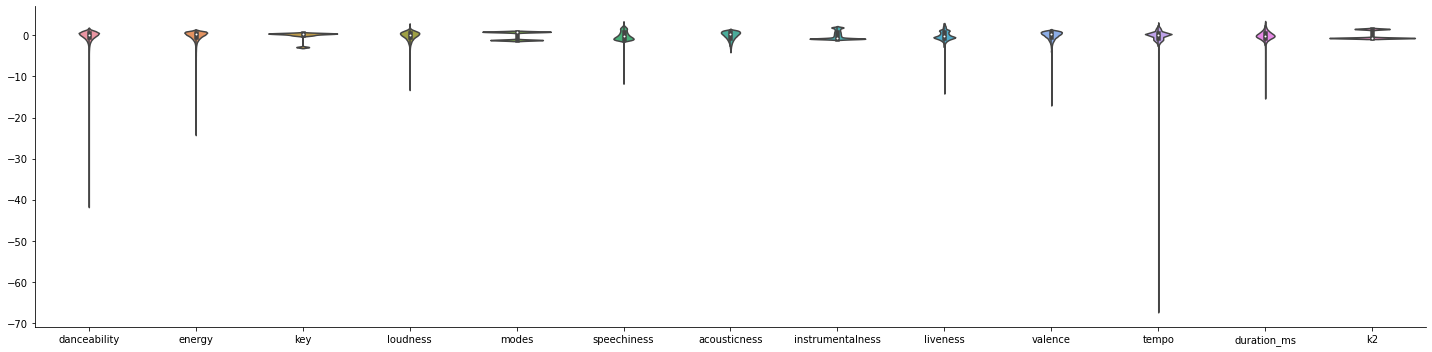

In [37]:
sns.catplot(data = pd.DataFrame(X_clean, columns=df_clean.columns), kind='violin', aspect=4)

plt.show()

In [39]:
k2_result = KMeans(n_clusters=2, random_state=101, n_init=100, max_iter=500).fit_predict(X_clean)

In [40]:
df_clean['k2'] = pd.Series( k2_result, index=df_clean.index )

In [41]:
tots_within = []

K = range(1, 26)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X)
    tots_within.append(km.inertia_)

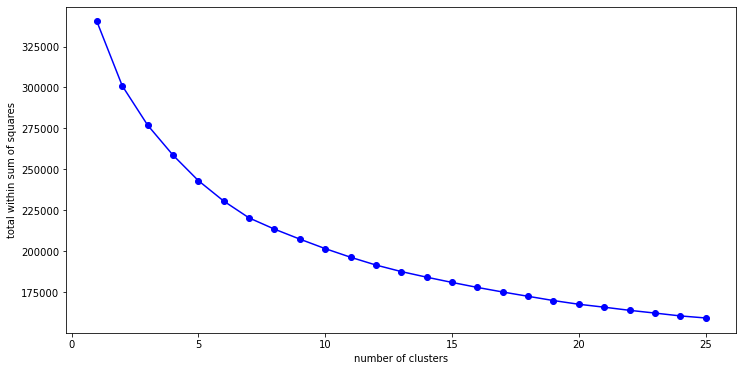

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

## PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
pop_pcs = PCA(n_components=2).fit_transform( X_clean )

In [45]:
pop_pcs.shape

(28356, 2)

In [46]:
pop_pcs_df = pd.DataFrame( pop_pcs, columns=['pc_01', 'pc_02'])

In [47]:
pop_pcs_df['pop'] = df_main.binary_outcome

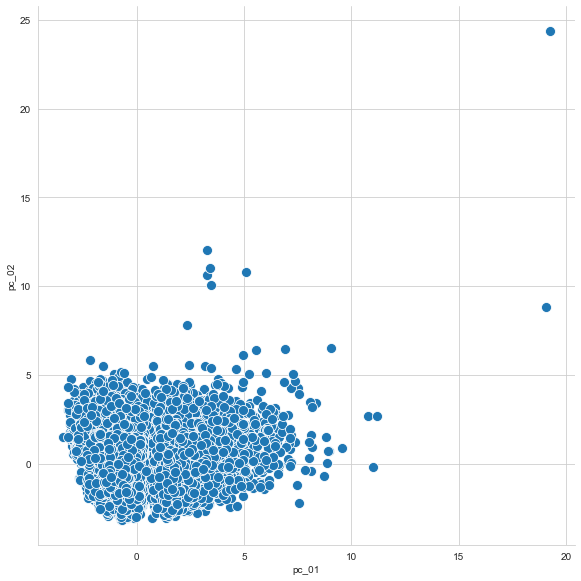

In [48]:
sns.set_style('whitegrid')

sns.relplot(data = pop_pcs_df, x='pc_01', y='pc_02', s=100, height=8)

plt.show()

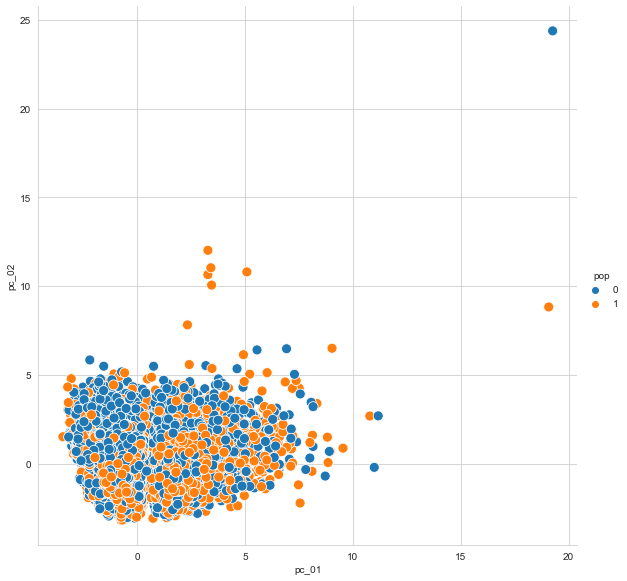

In [49]:
sns.relplot(data = pop_pcs_df, x='pc_01', y='pc_02', hue='pop', s=100, height=8)

plt.show()

In [50]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X_clean)
    tots_within.append(km.inertia_)

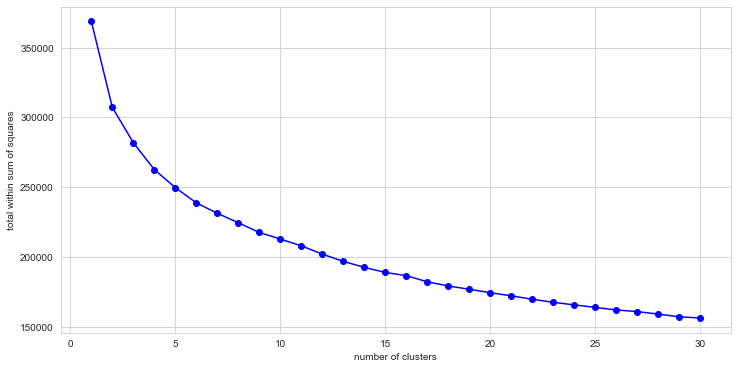

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
sil_coef = []

K = range(2, 31)

for k in K:
    k_label = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit_predict( X_clean )
    sil_coef.append( silhouette_score(X_clean, k_label) )

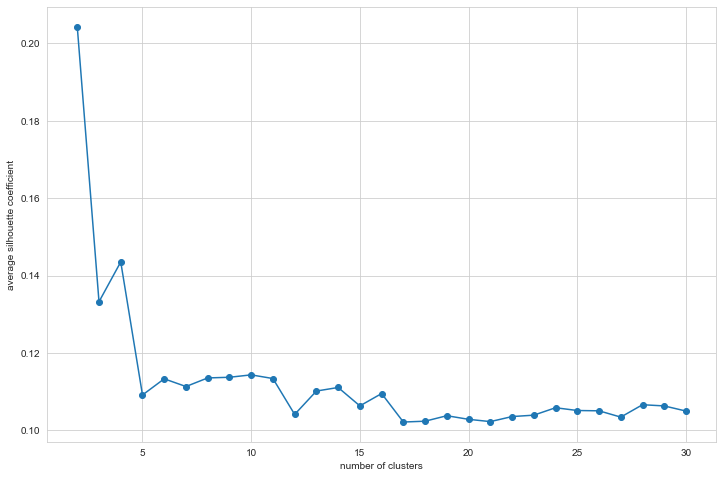

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(K, sil_coef, 'o-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('average silhouette coefficient')

plt.show()

## Hierarchical clustering

In [55]:
from scipy.cluster import hierarchy

In [ ]:
hclust_complete = hierarchy.complete( X_clean )

In [ ]:
fig = plt.figure(figsize=(16,8))

dn = hierarchy.dendrogram( hclust_complete, no_labels=True )

plt.show()

In [ ]:
### Ward method

In [ ]:
hclust_ward = hierarchy.ward( X_clean )

In [ ]:
fig = plt.figure(figsize=(16,8))

dn = hierarchy.dendrogram( hclust_ward, no_labels=True )

plt.show()

## Cut the tree

In [ ]:
ward_cut_5 = hierarchy.cut_tree( hclust_ward, n_clusters=5 )

In [ ]:
pop_pcs_df['hclust_5'] = pd.Series( ward_cut_5.ravel(), index=pop_pcs_df.index)

pop_pcs_df['hclust_5'] = pop_pcs_df.hclust_5.astype('category')

In [ ]:
sns.relplot(data = pop_pcs_df, x='pc_01', y='pc_02', hue='hclust_5', s=100, height=8)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))

sns.heatmap(pd.crosstab(pop_pcs_df.hclust_5, pop_pcs_df.churn, margins=True),
           annot=True, annot_kws={'size': 25})

plt.show()